<a href="https://colab.research.google.com/github/raheelahmadguraya/Intelligent-Systems-3/blob/main/ELE888_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

from sklearn.utils import shuffle
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, InputLayer
from tensorflow.keras.optimizers import Adam

np.set_printoptions(threshold=sys.maxsize)

In [ ]:
def generate():
  N = 30000
  x = np.linspace(-1, 1, N, endpoint=True)
  y = (0.2 * (x ** 4)) + (2 * (x ** 3)) + (0.1 * (x ** 2)) + 10

  return x, y

In [ ]:
def get_dataset():
  x, y = generate()

  return np.stack((x, y), axis=1)

In [ ]:
def scale(x_train, y_train, x_test, y_test, x_val, y_val):

  scaler = MinMaxScaler(feature_range=(0,1))
  train = np.stack((x_train, y_train), axis=1)
  val = np.stack((x_val, y_val), axis=1)
  test = np.stack((x_test, y_test), axis=1)

  scaler.fit(train)
  train = scaler.transform(train)
  val = scaler.transform(val)
  test = scaler.transform(test)

  x_train = train[:,0]
  y_train = train[:,1]

  x_val = val[:,0]
  y_val = val[:,1]

  x_test = test[:,0]
  y_test = test[:,1]

  return x_train, y_train, x_test, y_test, x_val, y_val

In [ ]:
def split(shuffled, scaled):
  train_ratio = 0.3
  validation_ratio = 0.2
  test_ratio = 0.5

  data = get_dataset()

  dataX = data[:,0]
  dataY = data[:,1]

  if shuffled == 1:
    x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio, shuffle=True)

    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=True)
  else:
    x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio, shuffle=False)

    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), shuffle=False)

  if scaled == 1:
    x_train, y_train, x_test, y_test, x_val, y_val = scale(x_train, y_train, x_test, y_test, x_val, y_val)

  return x_train, y_train, x_test, y_test, x_val, y_val

In [ ]:
def metric(y_test, y_pred):
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred, squared=False)
  rmse = metrics.mean_squared_error(y_test, y_pred,squared=True)
  r_two = metrics.r2_score(y_test, y_pred)

  print("\n")
  print("mae:", mae)
  print("mse:", mse)
  print("rmse:", rmse)
  print("r2 score:", r_two)

In [ ]:
def NNstruct1(x_train, y_train, x_test, y_test, x_val, y_val, act):
  model = Sequential(name="structure_1")
  model.add(Dense(units = 1, activation = 'linear', input_shape=[1]))
  model.add(Dense(units=12, activation=act))
  model.add(Dense(units=8, activation=act))
  model.add(Dense(units=4, activation=act))
  model.add(Dense(units=1, activation='linear'))

  model.summary()

  model.compile(loss='mse', optimizer='adam', metrics=['mse'])

  model.fit(x_train, y_train, epochs=20, batch_size = 12, validation_data=(x_val,y_val))

  return model

In [ ]:
def NNstruct2(x_train, y_train, x_test, y_test, x_val, y_val, act):
  model = Sequential(name="structure_2")
  model.add(InputLayer(1,))
  model.add(Dense(units=24, activation=act))
  model.add(Dense(units=1, activation='linear'))

  model.summary()

  model.compile(loss='mse', optimizer='adam', metrics=['mse'])

  model.fit(x_train, y_train, epochs=20, batch_size = 12, validation_data=(x_val,y_val))

  return model

In [ ]:
def train_model(arg1, arg2, act, struct):
  x_train, y_train, x_test, y_test, x_val, y_val = split(arg1, arg2)
  if struct == 1:
    model = NNstruct1(x_train, y_train, x_test, y_test, x_val, y_val, act)
  else:
    model = NNstruct2(x_train, y_train, x_test, y_test, x_val, y_val, act)



  plt.plot(x_test, y_pred, 'o')
  plt.xlabel("x_test")
  plt.ylabel("y_predict")
  if arg1 == 1 and arg2 == 1:
    plt.title("Case: Shuffled and scaled, Structure:{}, Activation:{}".format(struct, act))
  elif arg1 == 1 and arg2 == 0:
    plt.title("Case: Shuffled and not scaled, Structure:{}, Activation:{}".format(struct, act))
  elif arg1 == 0 and arg2 == 1:
    plt.title("Case: Not shuffled and scaled, Structure:{}, Activation:{}".format(struct, act))
  elif arg1 == 0 and arg2 == 0:
    plt.title("Case: Not shuffled and not scaled, Structure:{}, Activation:{}".format(struct, act))
  plt.show()

  plt.plot(x_test, y_test, 'o')
  plt.xlabel("x_test")
  plt.ylabel("y_test")
  plt.title("Test Data")
  plt.show()

  metric(y_test, y_pred)

  print("-------------------------------------------------------------------------------------------------------------")
  return model

Case 1



Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==============================] - 3s 2ms/step - loss: 19.2477 - mse: 19.2477 - val_loss: 0.25

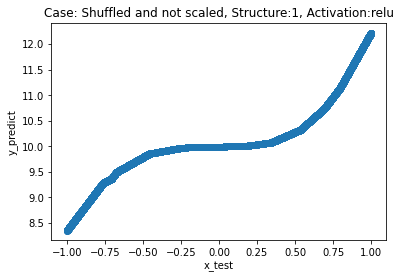

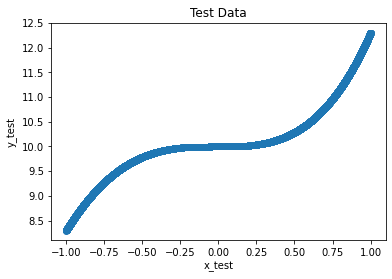



mae: 0.010339369491162714
mse: 0.013963513065223223
rmse: 0.00019497969712265964
r2 score: 0.9996553856810176
-------------------------------------------------------------------------------------------------------------
Case 2



Model: "structure_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 24)                48        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 25        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 34.0505 - mse: 34.0505 - val_loss: 0.1024 - val_mse: 0.1024
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0729 - mse: 0.0729 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 3/20
750/750 [===

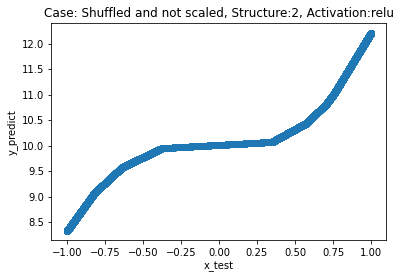

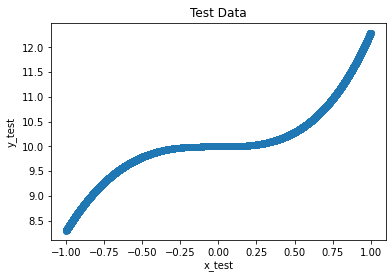



mae: 0.019679450379764533
mse: 0.025424297934869267
rmse: 0.0006463949254809976
r2 score: 0.9988691779246373
-------------------------------------------------------------------------------------------------------------
Case 3



Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 171
Trai

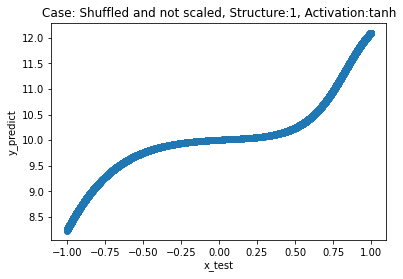

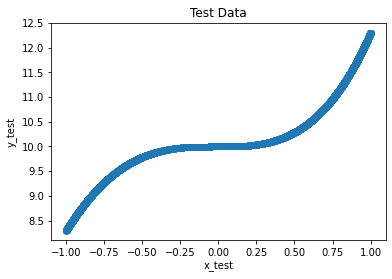



mae: 0.028614289673518634
mse: 0.03710657163009758
rmse: 0.001376897658139563
r2 score: 0.9976454747569777
-------------------------------------------------------------------------------------------------------------
Case 4



Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_13 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 171
Traina

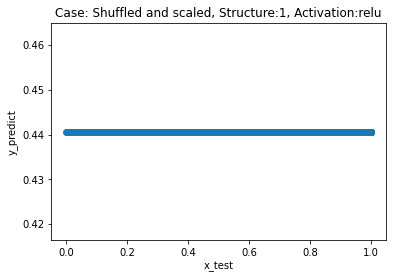

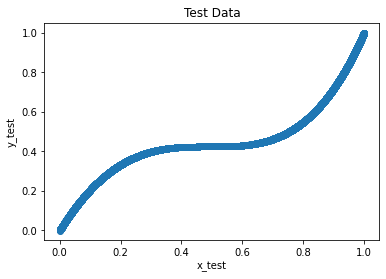



mae: 0.1288219348246928
mse: 0.19031277212407915
rmse: 0.03621895123355168
r2 score: -0.00018013518299020426
-------------------------------------------------------------------------------------------------------------
Case 5



Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_18 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 5         
Total params: 171
Trai

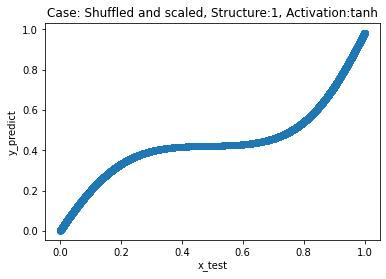

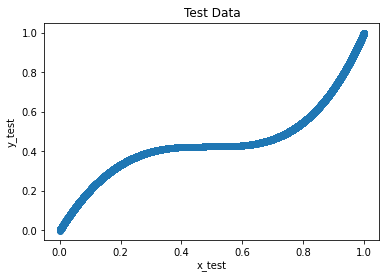



mae: 0.0029010100563941366
mse: 0.0038315015319550557
rmse: 1.468040398937394e-05
r2 score: 0.9995935141229932
-------------------------------------------------------------------------------------------------------------
Case 6



Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_23 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 5         
Total params: 171
Tr

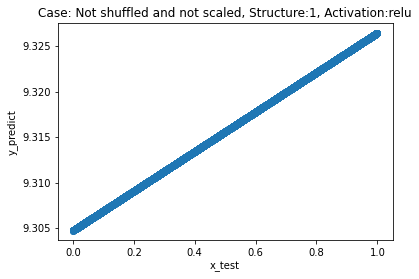

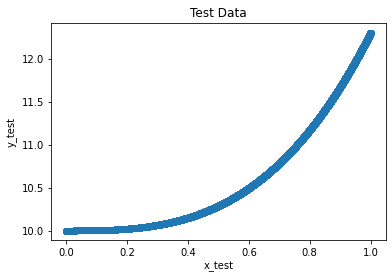



mae: 1.2577985823563036
mse: 1.4128907790446548
rmse: 1.9962603535094112
r2 score: -3.7346463019998453
-------------------------------------------------------------------------------------------------------------
Case 7



Model: "structure_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 24)                48        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 25        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 29.5728 - mse: 29.5728 - val_loss: 16.6866 - val_mse: 16.6866
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 2.1128 - mse: 2.1128 - val_loss: 12.7087 - val_mse: 12.7087
Epoch 3/20
750/750 [======

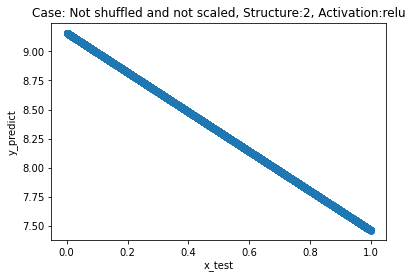

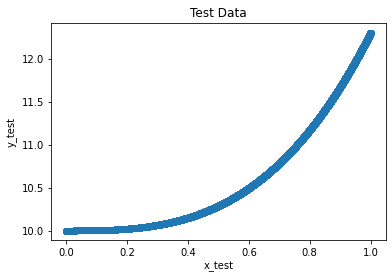



mae: 2.2637118723801075
mse: 2.5236614580830627
rmse: 6.368867155013931
r2 score: -14.105411110531692
-------------------------------------------------------------------------------------------------------------
Case 8



Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_30 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 5         
Total params: 171
Trainable p

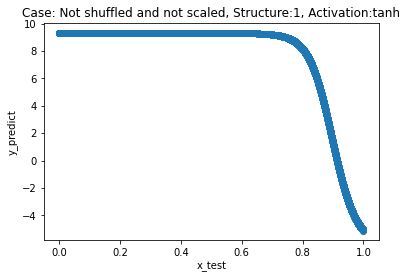

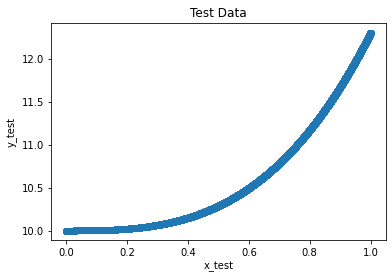



mae: 2.89097171751373
mse: 5.179738566337185
rmse: 26.829691615600797
r2 score: -62.63353355602356
-------------------------------------------------------------------------------------------------------------
Case 9



Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_35 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 5         
Total params: 171
Trainable para

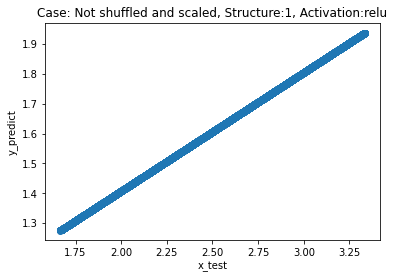

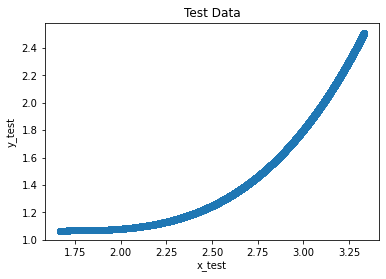



mae: 0.2825340321965677
mse: 0.3035302813225469
rmse: 0.09213063167974446
r2 score: 0.44543775787514905
-------------------------------------------------------------------------------------------------------------
Case 10



Model: "structure_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_40 (Dense)             (None, 12)                24        
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 5         
Total params: 171
Trainabl

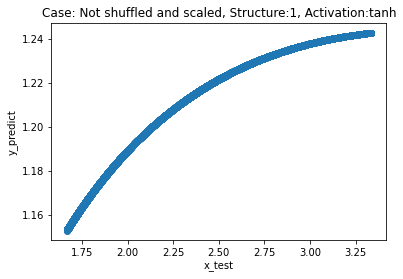

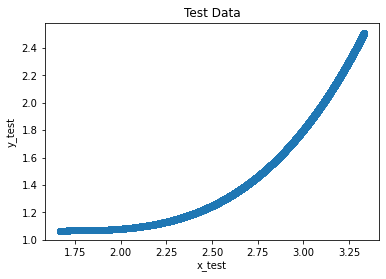



mae: 0.29378001357334815
mse: 0.44289715449834544
rmse: 0.19615788946273127
r2 score: -0.1807338884755234
-------------------------------------------------------------------------------------------------------------


In [ ]:
#Shuffled
print("Case 1\n")
print("\n")
train_model(1, 0, 'relu', 1)
print("Case 2\n")
print("\n")
train_model(1, 0, 'relu', 2)
print("Case 3\n")
print("\n")
train_model(1, 0, 'tanh', 1)
print("Case 4\n")
print("\n")
train_model(1, 1, 'relu', 1)
print("Case 5\n")
print("\n")
train_model(1, 1, 'tanh', 1)


#Unshuffled
print("Case 6\n")
print("\n")
train_model(0, 0, 'relu', 1)
print("Case 7\n")
print("\n")
train_model(0, 0, 'relu', 2)
print("Case 8\n")
print("\n")
train_model(0, 0, 'tanh', 1)
print("Case 9\n")
print("\n")
train_model(0, 1, 'relu', 1)
print("Case 10\n")
print("\n")
train_model(0, 1, 'tanh', 1)